In [ ]:
import gym
import numpy as np
from gym import spaces
import random 
import tqdm as tq

N_DISCRETE_ACTIONS = 2 # 0 reject 1 hire

class Secretary(gym.Env):
  metadata = {'render.modes' : ['human']}
  
  def __init__(self,N):
    super(Secretary,self).__init__()
    self.action_space = spaces.Discrete(N_DISCRETE_ACTIONS)
    self.observation_space = spaces.Box(low=0, high=1, shape=(3,), dtype=np.float32)
    self.N = N
    self.time = 0
    self.state = None
  
  def step(self,action):
    self.time+=1
    if(action == 1 or self.time == self.N):
      reward = self.state[2]
      done = True
      next_state = np.array([self.time/self.N,max(self.state[2],self.state[1]),-1],dtype = np.float32)
      if(action == 1):
        info = {'msg': 'the decision is made!'}
      else:
        info = {'msg': 'we reached to the last candidate!'}
      self.state = next_state
      return next_state, reward, done, info
    
    elif(action == 0):
      reward = 0
      done = False
      info = {'msg': 'next candidate!'}
      next_cand_score = random.random()
      next_state = np.array([self.time/self.N,max(self.state[2],self.state[1]),next_cand_score],dtype = np.float32)
      self.state = next_state
      return next_state,reward,done,info
    
  def reset(self):
    self.time = 0
    next_cand_score = random.random()
    self.state = np.array([0,0,next_cand_score],dtype = np.float32)
    return self.state
  
  def render(self, mode='human'):
        if mode == 'text':
            print(self.state)

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
N=20
def get_indices(state):
    return int(state[0]*20),int(state[1]*20),int(state[2]*20)

def get_next_action(fraction_interviewed,max_score,cur_score,epsilon,q):
  if(np.random.random()<epsilon):
    action=np.random.choice([0,1])
  else:
    action=np.argmax(q[fraction_interviewed,max_score,cur_score])
  
  return action

#q=np.random.uniform(low = -1,high = 1,size=(N+1,N+1,N+1,2))
#q=np.zeros((N+1,N+1,N+1,2))
# q=-np.ones((101,101,101,2))
def Discrete(state):
    state[0] = math.floor(state[0] / 0.05) * 0.05
    state[1] = math.floor(state[1] / 0.05) * 0.05
    state[2] = math.floor(state[2] / 0.05) * 0.05
    return state


def train(epsilon,discount_factor,lr,episodes,epsilon_decay_value):
    envi=Secretary(N)
    r = []
    r_100 = []
    reward_sum = 0
    epsilon_vals=[]
    q=np.random.uniform(low = -1,high = 1,size=(N+1,N+1,N+1,2))
    for ep in tq.tqdm(range(episodes)):
        envi.reset()
        cur_state = envi.state
        cur_state=Discrete(cur_state)
        while(True):
            cur_ind1,cur_ind2,cur_ind3=get_indices(cur_state)
            action=get_next_action(cur_ind1,cur_ind2,cur_ind3,epsilon,q)
            next_state, reward, done, info=envi.step(action)
            if(ep%SHOW_EVERY == 0):
              print(ep)
              print(reward,info)
            next_state=Discrete(next_state)
            next_ind1,next_ind2,next_ind3=get_indices(next_state)
                      
            old_q=q[cur_ind1,cur_ind2,cur_ind3,action]
            if not done:
              td=reward+discount_factor*np.max(q[next_ind1,next_ind2,next_ind3])-old_q
            else:
              td=reward-old_q
            if(ep%SHOW_EVERY == 0):
              print(td)
            new_q=old_q+td*lr
            q[cur_ind1,cur_ind2,cur_ind3,action]=new_q
            if(done):
                r.append(reward)
                if(ep>100):
                  r_100.append(np.mean(r[-100:]))
                break
            cur_state=next_state

        epsilon_vals.append(epsilon)   
        if(episodes//2 >= ep >= 1):
            epsilon -= epsilon_decay_value

        
    # plt.plot(np.arange(100,episodes),r_10)
    # plt.show()
    return envi,r,epsilon_vals,r_100,q

q_tables=[]
epsilon_vals_arr=[]
r_100_arr=[]
r_arr=[]
epsilon = 0.9
discount_factor = 0.99
lr = 0.5
episodes = 20_000_00 #state = 20*20*20 ~ 8000
epsilon_decay_value = epsilon/(episodes//2 - 1)
# epsilon_decay_value  = 0
SHOW_EVERY = 1_000_00
envi,r,epsilon_vals,r_100,q = train(epsilon,discount_factor,lr,episodes,epsilon_decay_value)
q_tables.append(q)
epsilon_vals_arr.append(epsilon_vals)
r_arr.append(r)
r_100_arr.append(r_100)

epsilon = 0.7
discount_factor = 0.99
envi,r,epsilon_vals,r_100,q = train(epsilon,discount_factor,lr,episodes,epsilon_decay_value)
q_tables.append(q)
epsilon_vals_arr.append(epsilon_vals)
r_arr.append(r)
r_100_arr.append(r_100)

epsilon = 0.7
discount_factor = 0.9
envi,r,epsilon_vals,r_100,q = train(epsilon,discount_factor,lr,episodes,epsilon_decay_value)
q_tables.append(q)
epsilon_vals_arr.append(epsilon_vals)
r_arr.append(r)
r_100_arr.append(r_100)

epsilon = 0.9
discount_factor = 0.9
envi,r,epsilon_vals,r_100,q = train(epsilon,discount_factor,lr,episodes,epsilon_decay_value)
q_tables.append(q)
epsilon_vals_arr.append(epsilon_vals)
r_arr.append(r)
r_100_arr.append(r_100)      

  0%|          | 1264/2000000 [00:00<08:19, 4004.48it/s]

0
0 {'msg': 'next candidate!'}
0.8045463558747625
0
0.95 {'msg': 'the decision is made!'}
0.09823318100723033


  5%|▌         | 100998/2000000 [00:30<08:58, 3525.74it/s]

100000
0.9 {'msg': 'the decision is made!'}
0.005525398960523176


 10%|█         | 200972/2000000 [00:55<08:57, 3344.21it/s]

200000
0.85 {'msg': 'the decision is made!'}
-0.03560199872256398


 15%|█▌        | 300941/2000000 [01:22<08:43, 3242.86it/s]

300000
0.85 {'msg': 'the decision is made!'}
-0.03550797020662455


 20%|██        | 400724/2000000 [01:51<06:45, 3943.86it/s]

400000
0 {'msg': 'next candidate!'}
0.05899687956409094
400000
0 {'msg': 'next candidate!'}
-0.06560654757153339
400000
0.35 {'msg': 'the decision is made!'}
0.035657831766680914


 25%|██▌       | 500764/2000000 [02:22<08:15, 3025.43it/s]

500000
0.6 {'msg': 'the decision is made!'}
-0.016908640290742127


 30%|███       | 600643/2000000 [02:52<07:23, 3158.35it/s]

600000
0 {'msg': 'next candidate!'}
-0.04907053044345144
600000
0 {'msg': 'next candidate!'}
-0.020715713616849984
600000
0.65 {'msg': 'the decision is made!'}
0.03750367756424333


 35%|███▌      | 700859/2000000 [03:26<08:31, 2541.48it/s]

700000
0 {'msg': 'next candidate!'}
-0.11243933276226192
700000
0 {'msg': 'next candidate!'}
0.01238385823031507
700000
0 {'msg': 'next candidate!'}
-0.08812249981529241
700000
0 {'msg': 'next candidate!'}
0.06887592544806975
700000
0 {'msg': 'next candidate!'}
-0.013814179245673186
700000
0 {'msg': 'next candidate!'}
0.016567547829464124
700000
0 {'msg': 'next candidate!'}
0.019771477432192763
700000
0 {'msg': 'next candidate!'}
-0.03322680435296066
700000
0 {'msg': 'next candidate!'}
-0.07077077745095073
700000
0.75 {'msg': 'the decision is made!'}
0.0


 40%|████      | 800474/2000000 [04:00<06:38, 3013.70it/s]

800000
0 {'msg': 'next candidate!'}
-0.007015227539946101
800000
0.8 {'msg': 'the decision is made!'}
0.0


 45%|████▌     | 900405/2000000 [04:37<07:29, 2446.72it/s]

900000
0 {'msg': 'next candidate!'}
-0.01620910486737903
900000
0 {'msg': 'next candidate!'}
0.14827469400595517
900000
0.95 {'msg': 'the decision is made!'}
0.0


 50%|█████     | 1000583/2000000 [05:14<07:14, 2302.59it/s]

1000000
0 {'msg': 'next candidate!'}
0.022595987660510408
1000000
0 {'msg': 'next candidate!'}
-0.03828868827872978
1000000
0 {'msg': 'next candidate!'}
-0.043958509470320206
1000000
0 {'msg': 'next candidate!'}
-0.08109987761673765
1000000
0 {'msg': 'next candidate!'}
0.03535419758388736
1000000
0 {'msg': 'next candidate!'}
0.09812182934155711
1000000
0 {'msg': 'next candidate!'}
-0.008331961847381608
1000000
0 {'msg': 'next candidate!'}
0.03801494466340216
1000000
0.9 {'msg': 'the decision is made!'}
0.024196795877469368


 55%|█████▌    | 1100674/2000000 [05:49<05:54, 2540.44it/s]

1100000
0 {'msg': 'next candidate!'}
-0.06897220362855028
1100000
0 {'msg': 'next candidate!'}
0.018978126120761107
1100000
0 {'msg': 'next candidate!'}
-0.02439391227783949
1100000
0 {'msg': 'next candidate!'}
0.012216760069276744
1100000
0 {'msg': 'next candidate!'}
0.07194228223624277
1100000
0.9 {'msg': 'the decision is made!'}
0.03386065980486419


 60%|██████    | 1200394/2000000 [06:24<03:15, 4085.41it/s]

1200000
0.95 {'msg': 'the decision is made!'}
0.0


 65%|██████▌   | 1300782/2000000 [06:58<04:34, 2544.99it/s]

1300000
0 {'msg': 'next candidate!'}
-0.07302565956597695
1300000
0 {'msg': 'next candidate!'}
-0.06708174896514674
1300000
0.75 {'msg': 'the decision is made!'}
0.0


 70%|███████   | 1400675/2000000 [07:33<03:59, 2499.06it/s]

1400000
0 {'msg': 'next candidate!'}
-0.003296095776808672
1400000
0 {'msg': 'next candidate!'}
-0.03728499336163238
1400000
0 {'msg': 'next candidate!'}
0.09043146529589685
1400000
0.85 {'msg': 'the decision is made!'}
-0.04772705293017909


 75%|███████▌  | 1500671/2000000 [08:07<03:17, 2525.86it/s]

1500000
0 {'msg': 'next candidate!'}
-0.025755065392863097
1500000
0 {'msg': 'next candidate!'}
-0.0193600692683783
1500000
0.75 {'msg': 'the decision is made!'}
0.0


 80%|████████  | 1600638/2000000 [08:39<01:54, 3477.76it/s]

1600000
0.75 {'msg': 'the decision is made!'}
0.0


 85%|████████▌ | 1700612/2000000 [09:13<01:48, 2762.82it/s]

1700000
0 {'msg': 'next candidate!'}
0.06341464639674887
1700000
0 {'msg': 'next candidate!'}
-0.060656720363022165
1700000
0 {'msg': 'next candidate!'}
0.06205007861260514
1700000
0 {'msg': 'next candidate!'}
-0.0357526879020269
1700000
0 {'msg': 'next candidate!'}
-0.08041035899906801
1700000
0 {'msg': 'next candidate!'}
0.06772912855713031
1700000
0 {'msg': 'next candidate!'}
-0.06376769585107722
1700000
0 {'msg': 'next candidate!'}
-0.040142729859048876
1700000
0 {'msg': 'next candidate!'}
0.03168110507451238
1700000
0 {'msg': 'next candidate!'}
-0.15729324270206324
1700000
0 {'msg': 'next candidate!'}
-0.033384205602065786
1700000
0 {'msg': 'next candidate!'}
0.06030842566968697
1700000
0 {'msg': 'next candidate!'}
0.030144203155967886
1700000
0.7 {'msg': 'the decision is made!'}
0.0


 90%|█████████ | 1800761/2000000 [09:47<01:09, 2866.29it/s]

1800000
0.9 {'msg': 'the decision is made!'}
0.04811840407148826


 95%|█████████▌| 1900791/2000000 [10:20<00:37, 2626.36it/s]

1900000
0.8 {'msg': 'the decision is made!'}
0.0


  0%|          | 1245/2000000 [00:00<08:06, 4107.42it/s]

0
0 {'msg': 'next candidate!'}
0.5341854931884247
0
0.35 {'msg': 'the decision is made!'}
-0.027140703662599908


  5%|▌         | 100875/2000000 [00:26<07:50, 4038.87it/s]

100000
0.25 {'msg': 'the decision is made!'}
0.0


 10%|█         | 200595/2000000 [00:53<07:18, 4103.92it/s]

200000
0 {'msg': 'next candidate!'}
0.08723237012719909
200000
0.85 {'msg': 'the decision is made!'}
-0.037610072352435076


 15%|█▌        | 300712/2000000 [01:24<09:26, 2997.58it/s]

300000
0 {'msg': 'next candidate!'}
0.08000763801721777
300000
0 {'msg': 'next candidate!'}
-0.017502020403013185
300000
0 {'msg': 'next candidate!'}
-0.0012271236361188764
300000
0 {'msg': 'next candidate!'}
-0.042819418712561674
300000
0 {'msg': 'next candidate!'}
-0.026252312215902074
300000
0.35 {'msg': 'the decision is made!'}
0.0412952006309954


 20%|██        | 400787/2000000 [01:56<08:13, 3242.63it/s]

400000
0 {'msg': 'next candidate!'}
0.01726074719309123
400000
0 {'msg': 'next candidate!'}
0.1355191853818376
400000
0.95 {'msg': 'the decision is made!'}
0.0


 25%|██▌       | 500763/2000000 [02:29<08:15, 3023.69it/s]

500000
0 {'msg': 'next candidate!'}
-0.030057567526584283
500000
0 {'msg': 'next candidate!'}
0.04935799008357722
500000
0 {'msg': 'next candidate!'}
-0.02602561460955799
500000
0 {'msg': 'next candidate!'}
0.07164548192096754
500000
0.85 {'msg': 'the decision is made!'}
-0.04629795103482104


 30%|███       | 600749/2000000 [03:03<08:06, 2876.60it/s]

600000
0 {'msg': 'next candidate!'}
0.007015203343689214
600000
0 {'msg': 'next candidate!'}
-0.034080124848489435
600000
0 {'msg': 'next candidate!'}
0.07771729868860444
600000
0 {'msg': 'next candidate!'}
-0.1263143627821357
600000
0 {'msg': 'next candidate!'}
-0.014018691571955899
600000
0 {'msg': 'next candidate!'}
0.0019454252612531864
600000
0 {'msg': 'next candidate!'}
-0.041035446750935956
600000
0 {'msg': 'next candidate!'}
0.039069384932859164
600000
0 {'msg': 'next candidate!'}
-0.08474177069097377
600000
0.6 {'msg': 'the decision is made!'}
-0.018192660274095496


 35%|███▌      | 700684/2000000 [03:37<08:12, 2640.00it/s]

700000
0 {'msg': 'next candidate!'}
-0.09747001080796436
700000
0 {'msg': 'next candidate!'}
-0.01210482296631965
700000
0 {'msg': 'next candidate!'}
0.008734435056402035
700000
0 {'msg': 'next candidate!'}
0.011104179414253235
700000
0 {'msg': 'next candidate!'}
-0.013295164760923406
700000
0.8 {'msg': 'the decision is made!'}
0.0


 40%|████      | 800508/2000000 [04:12<08:09, 2450.66it/s]

800000
0 {'msg': 'next candidate!'}
-0.015836688497304685
800000
0 {'msg': 'next candidate!'}
0.08606295073390391
800000
0.9 {'msg': 'the decision is made!'}
0.024416590052227516


 45%|████▌     | 900356/2000000 [04:45<06:08, 2981.82it/s]

900000
0.95 {'msg': 'the decision is made!'}
0.0


 50%|█████     | 1000734/2000000 [05:19<06:35, 2526.42it/s]

1000000
0 {'msg': 'next candidate!'}
0.025490258387273146
1000000
0 {'msg': 'next candidate!'}
-0.05227135505348701
1000000
0 {'msg': 'next candidate!'}
-0.0544711365856172
1000000
0 {'msg': 'next candidate!'}
-0.003523855815187882
1000000
0 {'msg': 'next candidate!'}
0.005364475454210149
1000000
0 {'msg': 'next candidate!'}
-0.07625414606562086
1000000
0.7 {'msg': 'the decision is made!'}
0.0


 55%|█████▌    | 1100526/2000000 [05:52<05:29, 2725.91it/s]

1100000
0 {'msg': 'next candidate!'}
0.023776290642144926
1100000
0 {'msg': 'next candidate!'}
-0.007443757644009286
1100000
0 {'msg': 'next candidate!'}
-0.07582764061932934
1100000
0 {'msg': 'next candidate!'}
0.05472777064631262
1100000
0 {'msg': 'next candidate!'}
0.14697659502865146
1100000
0.95 {'msg': 'the decision is made!'}
0.0


 60%|██████    | 1200605/2000000 [06:24<04:51, 2744.72it/s]

1200000
0 {'msg': 'next candidate!'}
-0.027068027808081152
1200000
0 {'msg': 'next candidate!'}
0.02818822362090856
1200000
0 {'msg': 'next candidate!'}
-0.03670915011998821
1200000
0 {'msg': 'next candidate!'}
0.10198654765036796
1200000
0 {'msg': 'next candidate!'}
-0.12218027952069221
1200000
0 {'msg': 'next candidate!'}
0.06672157296758996
1200000
0 {'msg': 'next candidate!'}
-0.1175728922321222
1200000
0 {'msg': 'next candidate!'}
0.06197041312613005
1200000
0.8 {'msg': 'the decision is made!'}
0.0


 65%|██████▌   | 1300339/2000000 [06:56<04:43, 2467.98it/s]

1300000
0 {'msg': 'next candidate!'}
-0.08336840858917915
1300000
0 {'msg': 'next candidate!'}
0.12195423569229158
1300000
0 {'msg': 'next candidate!'}
-0.15812397160886327
1300000
0 {'msg': 'next candidate!'}
0.09979711387658985
1300000
0.8 {'msg': 'the decision is made!'}
0.0


 70%|███████   | 1401328/2000000 [07:29<03:05, 3228.22it/s]

1400000
0.95 {'msg': 'the decision is made!'}
0.0


 75%|███████▌  | 1500813/2000000 [08:01<01:58, 4219.99it/s]

1500000
0 {'msg': 'next candidate!'}
0.06425862224495793
1500000
0 {'msg': 'next candidate!'}
0.014237194890068583
1500000
0.9 {'msg': 'the decision is made!'}
0.03203726261494588


 80%|████████  | 1600475/2000000 [08:31<02:04, 3213.78it/s]

1600000
0 {'msg': 'next candidate!'}
0.08410320197686116
1600000
0.85 {'msg': 'the decision is made!'}
-0.023006669076268138


 85%|████████▌ | 1700692/2000000 [09:05<01:46, 2808.12it/s]

1700000
0 {'msg': 'next candidate!'}
-0.0174163711760269
1700000
0 {'msg': 'next candidate!'}
-0.0491627451963601
1700000
0 {'msg': 'next candidate!'}
0.021335332441646426
1700000
0 {'msg': 'next candidate!'}
-0.0047821170646735744
1700000
0 {'msg': 'next candidate!'}
-0.06253936504028457
1700000
0 {'msg': 'next candidate!'}
-0.05480222888608133
1700000
0 {'msg': 'next candidate!'}
0.04979949284769969
1700000
0 {'msg': 'next candidate!'}
0.005170740384835115
1700000
0 {'msg': 'next candidate!'}
0.07224368085697819
1700000
0 {'msg': 'next candidate!'}
-0.1888822840374672
1700000
0 {'msg': 'next candidate!'}
0.04552163640542817
1700000
0 {'msg': 'next candidate!'}
-0.07984631267133169
1700000
0 {'msg': 'next candidate!'}
0.0006579450081840577
1700000
0.65 {'msg': 'the decision is made!'}
0.017567584078045817


 90%|█████████ | 1800503/2000000 [09:39<01:08, 2910.76it/s]

1800000
0 {'msg': 'next candidate!'}
-0.028109283977683308
1800000
0 {'msg': 'next candidate!'}
-0.03832977863109088
1800000
0 {'msg': 'next candidate!'}
0.03851195730528223
1800000
0 {'msg': 'next candidate!'}
-0.0673756154313574
1800000
0 {'msg': 'next candidate!'}
0.024024277561847662
1800000
0 {'msg': 'next candidate!'}
-0.11609521273427814
1800000
0 {'msg': 'next candidate!'}
0.17740140455082098
1800000
0.9 {'msg': 'the decision is made!'}
0.011096407346007253


 95%|█████████▌| 1900406/2000000 [10:11<00:33, 2991.81it/s]

1900000
0 {'msg': 'next candidate!'}
-0.027720925358528214
1900000
0 {'msg': 'next candidate!'}
0.032057944442717035
1900000
0 {'msg': 'next candidate!'}
0.05463185205670906
1900000
0.85 {'msg': 'the decision is made!'}
-0.025448411771590518


  0%|          | 859/2000000 [00:00<07:53, 4223.60it/s]

0
0 {'msg': 'next candidate!'}
0.9065319837380655
0
0 {'msg': 'next candidate!'}
-0.7184543287783779
0
0 {'msg': 'next candidate!'}
0.3596666569808883
0
0 {'msg': 'next candidate!'}
-0.42744400877808586
0
0 {'msg': 'next candidate!'}
1.126634955718281
0
0.7 {'msg': 'the decision is made!'}
0.5407889212465309


  5%|▌         | 101049/2000000 [00:24<07:32, 4192.16it/s]

100000
0 {'msg': 'next candidate!'}
0.09762809873605871
100000
0.75 {'msg': 'the decision is made!'}
0.0


 10%|█         | 200773/2000000 [00:48<06:45, 4434.37it/s]

200000
0 {'msg': 'next candidate!'}
-0.07254926159943664
200000
0 {'msg': 'next candidate!'}
-0.14882013813250383
200000
0 {'msg': 'next candidate!'}
-0.16588814306569527
200000
0.5 {'msg': 'the decision is made!'}
0.0


 15%|█▌        | 300802/2000000 [01:12<07:49, 3620.96it/s]

300000
0 {'msg': 'next candidate!'}
-0.1468958012617897
300000
0 {'msg': 'next candidate!'}
-0.13757256186794853
300000
0 {'msg': 'next candidate!'}
0.2077761277077208
300000
0.95 {'msg': 'the decision is made!'}
0.0


 20%|██        | 401166/2000000 [01:35<06:30, 4089.23it/s]

400000
0 {'msg': 'next candidate!'}
0.02526014200725135
400000
0 {'msg': 'next candidate!'}
0.11426823502658678
400000
0.8 {'msg': 'the decision is made!'}
0.0


 25%|██▌       | 501387/2000000 [01:59<05:11, 4816.50it/s]

500000
0.85 {'msg': 'the decision is made!'}
-0.009356613370890776


 30%|███       | 601653/2000000 [02:21<04:16, 5449.23it/s]

600000
0 {'msg': 'next candidate!'}
0.15861481483209228
600000
0.8 {'msg': 'the decision is made!'}
0.0


 35%|███▌      | 701205/2000000 [02:41<04:54, 4409.07it/s]

700000
0 {'msg': 'next candidate!'}
-0.038311072612899455
700000
0 {'msg': 'next candidate!'}
-0.07338982575484376
700000
0 {'msg': 'next candidate!'}
-0.06257301254765057
700000
0.35 {'msg': 'the decision is made!'}
0.012960599491798508


 40%|████      | 800928/2000000 [03:02<04:26, 4506.48it/s]

800000
0 {'msg': 'next candidate!'}
0.20803182772282158
800000
0.8 {'msg': 'the decision is made!'}
0.0


 45%|████▌     | 900912/2000000 [03:23<04:27, 4108.05it/s]

900000
0 {'msg': 'next candidate!'}
-0.01575144569034237
900000
0.8 {'msg': 'the decision is made!'}
0.0


 50%|█████     | 1001250/2000000 [03:42<03:26, 4829.50it/s]

1000000
0.85 {'msg': 'the decision is made!'}
-0.02792406423306404


 55%|█████▌    | 1100380/2000000 [04:01<02:41, 5568.76it/s]

1100000
0 {'msg': 'next candidate!'}
-0.09225747459935973
1100000
0 {'msg': 'next candidate!'}
0.18813226814727063
1100000
0 {'msg': 'next candidate!'}
-0.05712012516387299
1100000
0 {'msg': 'next candidate!'}
-0.10144301825297497
1100000
0.6 {'msg': 'the decision is made!'}
-0.03225203455985637


 60%|██████    | 1200655/2000000 [04:20<02:45, 4843.98it/s]

1200000
0.7 {'msg': 'the decision is made!'}
0.0


 65%|██████▌   | 1301393/2000000 [04:38<02:30, 4646.27it/s]

1300000
0 {'msg': 'next candidate!'}
-0.06701693162313482
1300000
0 {'msg': 'next candidate!'}
0.19282820153579971
1300000
0.85 {'msg': 'the decision is made!'}
-0.01186636694342913


 70%|███████   | 1400871/2000000 [04:57<01:55, 5190.35it/s]

1400000
0 {'msg': 'next candidate!'}
-0.190676347114362
1400000
0 {'msg': 'next candidate!'}
0.05480688115753396
1400000
0 {'msg': 'next candidate!'}
-0.21844043143986996
1400000
0.5 {'msg': 'the decision is made!'}
0.0


 75%|███████▌  | 1500965/2000000 [05:17<01:28, 5669.99it/s]

1500000
0 {'msg': 'next candidate!'}
0.3094620128752057
1500000
0.95 {'msg': 'the decision is made!'}
0.0


 80%|████████  | 1601048/2000000 [05:35<01:16, 5203.86it/s]

1600000
0.85 {'msg': 'the decision is made!'}
-0.04707971277454115


 85%|████████▌ | 1701048/2000000 [05:53<00:49, 6054.56it/s]

1700000
0.65 {'msg': 'the decision is made!'}
0.012505890895233573


 90%|█████████ | 1800838/2000000 [06:10<00:36, 5498.90it/s]

1800000
0.6 {'msg': 'the decision is made!'}
-0.017769766869770054


 95%|█████████▌| 1901749/2000000 [06:27<00:17, 5490.19it/s]

1900000
0 {'msg': 'next candidate!'}
0.15966600215583548
1900000
0.8 {'msg': 'the decision is made!'}
0.0


  0%|          | 1162/2000000 [00:00<08:57, 3720.43it/s]

0
0 {'msg': 'next candidate!'}
1.319539532553461
0
0 {'msg': 'next candidate!'}
1.3462664808198765
0
0.5 {'msg': 'the decision is made!'}
-0.24891311971352104


  5%|▌         | 101092/2000000 [00:23<08:34, 3690.79it/s]

100000
0 {'msg': 'next candidate!'}
-0.12866346556015762
100000
0.1 {'msg': 'the decision is made!'}
0.0


 10%|█         | 201125/2000000 [00:47<07:34, 3960.35it/s]

200000
0.6 {'msg': 'the decision is made!'}
-0.04901412494662649


 15%|█▌        | 300825/2000000 [01:11<07:32, 3754.51it/s]

300000
0.55 {'msg': 'the decision is made!'}
0.0


 20%|██        | 400952/2000000 [01:35<06:02, 4413.42it/s]

400000
0.95 {'msg': 'the decision is made!'}
0.0


 25%|██▌       | 500829/2000000 [01:58<05:06, 4891.81it/s]

500000
0 {'msg': 'next candidate!'}
-0.18560457058359336
500000
0.6 {'msg': 'the decision is made!'}
-0.019081613423708954


 30%|███       | 600701/2000000 [02:20<05:37, 4141.28it/s]

600000
0.6 {'msg': 'the decision is made!'}
-0.02767063962957106


 35%|███▌      | 701198/2000000 [02:43<05:07, 4229.84it/s]

700000
0.6 {'msg': 'the decision is made!'}
-0.024731688528646822


 40%|████      | 800966/2000000 [03:05<05:40, 3523.35it/s]

800000
0 {'msg': 'next candidate!'}
0.13321964667545427
800000
0.85 {'msg': 'the decision is made!'}
-0.016869757966891497


 45%|████▌     | 900756/2000000 [03:27<04:02, 4532.91it/s]

900000
0 {'msg': 'next candidate!'}
0.22114032515380033
900000
0.9 {'msg': 'the decision is made!'}
0.03256141467153362


 50%|█████     | 1001121/2000000 [03:48<04:11, 3968.67it/s]

1000000
0 {'msg': 'next candidate!'}
0.20511299717239528
1000000
0.9 {'msg': 'the decision is made!'}
0.0171345062014312


 55%|█████▌    | 1101063/2000000 [04:08<03:08, 4768.81it/s]

1100000
0 {'msg': 'next candidate!'}
0.1673827111455547
1100000
0.95 {'msg': 'the decision is made!'}
0.0


 60%|██████    | 1200982/2000000 [04:29<02:52, 4642.66it/s]

1200000
0 {'msg': 'next candidate!'}
-0.2637958391303298
1200000
0 {'msg': 'next candidate!'}
-0.0879915606993053
1200000
0 {'msg': 'next candidate!'}
0.22322970381564655
1200000
0.75 {'msg': 'the decision is made!'}
0.0


 65%|██████▌   | 1301222/2000000 [04:50<02:40, 4347.66it/s]

1300000
0.95 {'msg': 'the decision is made!'}
0.0


 70%|███████   | 1400748/2000000 [05:08<01:37, 6154.63it/s]

1400000
0.9 {'msg': 'the decision is made!'}
0.01323440547181054


 75%|███████▌  | 1500971/2000000 [05:25<01:12, 6907.29it/s]

1500000
0.7 {'msg': 'the decision is made!'}
0.0


 80%|████████  | 1601456/2000000 [05:42<00:55, 7182.42it/s]

1600000
0 {'msg': 'next candidate!'}
0.11586532859534515
1600000
0.85 {'msg': 'the decision is made!'}
-0.011741613848731625


 85%|████████▌ | 1701250/2000000 [05:59<00:45, 6535.19it/s]

1700000
0.45 {'msg': 'the decision is made!'}
0.015686105472372924


 90%|█████████ | 1800723/2000000 [06:16<00:31, 6386.08it/s]

1800000
0 {'msg': 'next candidate!'}
0.10691141540607396
1800000
0.65 {'msg': 'the decision is made!'}
0.03491000562092228


 95%|█████████▌| 1901249/2000000 [06:33<00:19, 5137.12it/s]

1900000
0.6 {'msg': 'the decision is made!'}
-0.037169347742952


100%|██████████| 2000000/2000000 [06:51<00:00, 4865.98it/s]


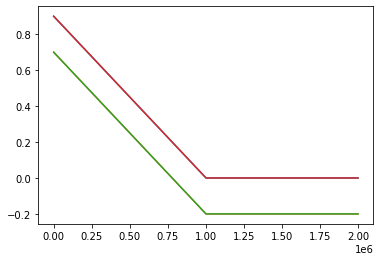

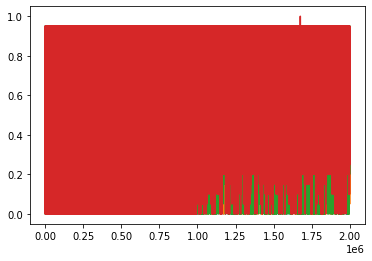

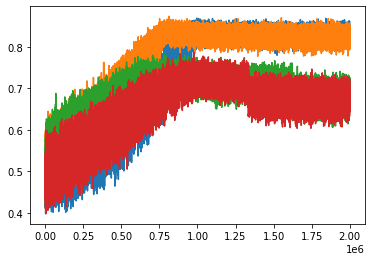

In [ ]:
for i in range(len(epsilon_vals_arr)):
  plt.plot(np.arange(len(epsilon_vals_arr[i])),epsilon_vals_arr[i])

plt.show()

for i in range(len(r_arr)):
  plt.plot(np.arange(len(r_arr[i])),r_arr[i])

plt.show()

for i in range(len(r_100_arr)):
  plt.plot(np.arange(100,len(r_100_arr[i])),r_100_arr[i][100:])

plt.show()

In [ ]:
def step(state,action,time, curr_arr, idx):
    time+=1
    if(action == 1 or time == N):
      reward = state[2]
      done = True
      next_state = np.array([time/N,max(state[2],state[1]),-1])
      if(action == 1):
        info = {'msg': 'the decision is made!'}
      else:
        info = {'msg': 'we reached to the last candidate!'}
      state = next_state
      return next_state, reward, done, info, time
    
    elif(action == 0):
      reward = 0
      done = False
      info = {'msg': 'next candidate!'}
      next_cand_score = curr_arr[idx]
      next_state = np.array([time/N,max(state[2],state[1]),next_cand_score])
      state = next_state
      return next_state,reward,done,info, time

In [ ]:
def test_1(envi,episodes,test_arr,q,epsilon=0):
  r  = []
  r_100 = []
  time_arr = []
  for ep in tq.tqdm(range(episodes)):
    curr_arr = test_arr[ep]
    cur_state = np.array([0,0,curr_arr[0]])
    cur_state=Discrete(cur_state)
    time = 0
    idx = 0
    while True:
      cur_ind1,cur_ind2,cur_ind3=get_indices(cur_state)
      action=get_next_action(cur_ind1,cur_ind2,cur_ind3,epsilon,q)
      next_state, reward, done, info, time=step(cur_state,action,time,curr_arr,idx+1)
      next_state=Discrete(next_state)
      if(done):
        r.append(reward)
        time_arr.append(time)
        if(ep>100):
          r_100.append(np.mean(r[-100:]))
        break
      cur_state=next_state
      idx = idx + 1
  # plt.plot(np.arange(episodes),r_100)
  # plt.show()
  return r, time_arr,r_100

def get_testing_arr(epsiodes,N):
  test_arr = []
  act_y = []
  act_y_args=[]
  for i in range(episodes):
    temp = np.random.rand(N)
    test_arr.append(temp)
    act_y.append(max(temp))
    act_y_args.append(np.argmax(temp))
  return test_arr,act_y,act_y_args

episodes = 1000
test_arr, act_y, act_y_args = get_testing_arr(episodes, N)
r_100_arr=[]
pred_y_arr=[]
time_arrays=[]
for i in range(len(q_tables)):
  pred_y,time_arr,r_100=test_1(envi,episodes,test_arr,q_tables[i])
  r_100_arr.append(r_100)
  time_arrays.append(time_arr)
  pred_y_arr.append(pred_y)


100%|██████████| 1000/1000 [00:00<00:00, 12509.26it/s]


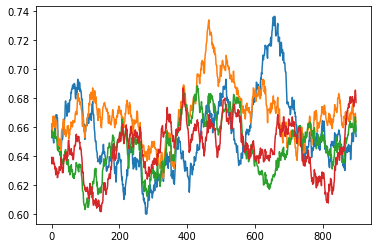

Mean of difference between predicted and actual :0.2962967357705693
Mean of difference between predicted and actual :0.2845467357705692
Mean of difference between predicted and actual :0.30394673577056924
Mean of difference between predicted and actual :0.30464673577056933
Mean of time arrays : 3.121
Mean of time arrays : 2.672
Mean of time arrays : 1.765
Mean of time arrays : 1.932


In [ ]:
for i in range(len(r_100_arr)):
  plt.plot(np.arange(len(r_100_arr[i])),r_100_arr[i])

plt.show()
for i in range(len(pred_y_arr)):
  print("Mean of difference between predicted and actual :"+str(np.mean(np.array(act_y)-np.array(pred_y_arr[i]))))

for i in range(len(time_arrays)):
  print("Mean of time arrays : "+str(np.mean(time_arrays[i])))